In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/Churn_Modelling.csv')

In [3]:
df = df.drop(columns = ['RowNumber', 'CustomerId', 'Surname'])

In [4]:
df.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2840,528,Spain,Male,40.0,4,0.00,2,1.0,0.0,25399.70,0
8726,697,Germany,Male,43.0,8,103409.16,1,1.0,0.0,66893.28,1
1747,586,Germany,Male,34.0,9,74309.81,1,1.0,0.0,15034.93,0
7551,626,France,Female,37.0,2,133968.96,2,1.0,0.0,148689.65,0
3555,528,France,Female,36.0,1,156948.41,1,1.0,1.0,149912.28,1


In [5]:
print(df['Geography'].unique())

print(f'\nThe countries frequencies are: \n{df['Geography'].value_counts()}')

['France' 'Spain' nan 'Germany']

The countries frequencies are: 
Geography
France     5014
Germany    2510
Spain      2477
Name: count, dtype: int64


CHECKING NULL VALUES

In [6]:
#print(df.isnull().sum())

df.dropna(inplace = True)

In [7]:
df.shape

(9998, 11)

In [8]:
df.sample(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9295,658,Germany,Female,45.0,9,134562.80,1,1.0,1.0,159268.67,0
9339,665,Spain,Male,29.0,1,182781.74,2,1.0,1.0,63732.90,0


In [9]:
from sklearn.preprocessing import OneHotEncoder

encoder_geo = OneHotEncoder(sparse_output=False)
encoder_gen = OneHotEncoder(sparse_output=False)

encoded_geo = encoder_geo.fit_transform(df[['Geography']])
encoded_gen = encoder_gen.fit_transform(df[['Gender']])

encoded_geo_columns = encoder_geo.get_feature_names_out(['Geography'])
encoded_gen_columns = encoder_gen.get_feature_names_out(['Gender'])

In [10]:
geography_emb = pd.DataFrame(encoded_geo, columns=encoded_geo_columns,index = df.index)
gender_emb = pd.DataFrame(encoded_gen, columns=encoded_gen_columns, index = df.index)

In [11]:
gender_emb.sample(3)

,Gender_Female,Gender_Male
8601,0.0,1.0
826,1.0,0.0
6742,1.0,0.0


In [12]:
df.drop(columns = ['Gender', 'Geography'], inplace = True)

In [13]:
assert gender_emb.shape[0]==geography_emb.shape[0] == df.shape[0], "incorrect shape"

cleaned_df = pd.concat([df, geography_emb, gender_emb ], axis = 1)

In [14]:
cleaned_df.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7403,796,56.0,6,94231.13,1,0.0,0.0,121164.60,1,0.0,0.0,1.0,0.0,1.0
4268,753,46.0,8,0.00,3,1.0,0.0,90747.94,1,1.0,0.0,0.0,0.0,1.0
7019,637,36.0,2,152606.82,1,1.0,1.0,71692.80,0,1.0,0.0,0.0,0.0,1.0
3219,505,37.0,10,122453.97,2,1.0,1.0,52693.99,0,0.0,1.0,0.0,1.0,0.0
7717,692,46.0,2,0.00,2,1.0,1.0,105983.09,0,0.0,0.0,1.0,0.0,1.0


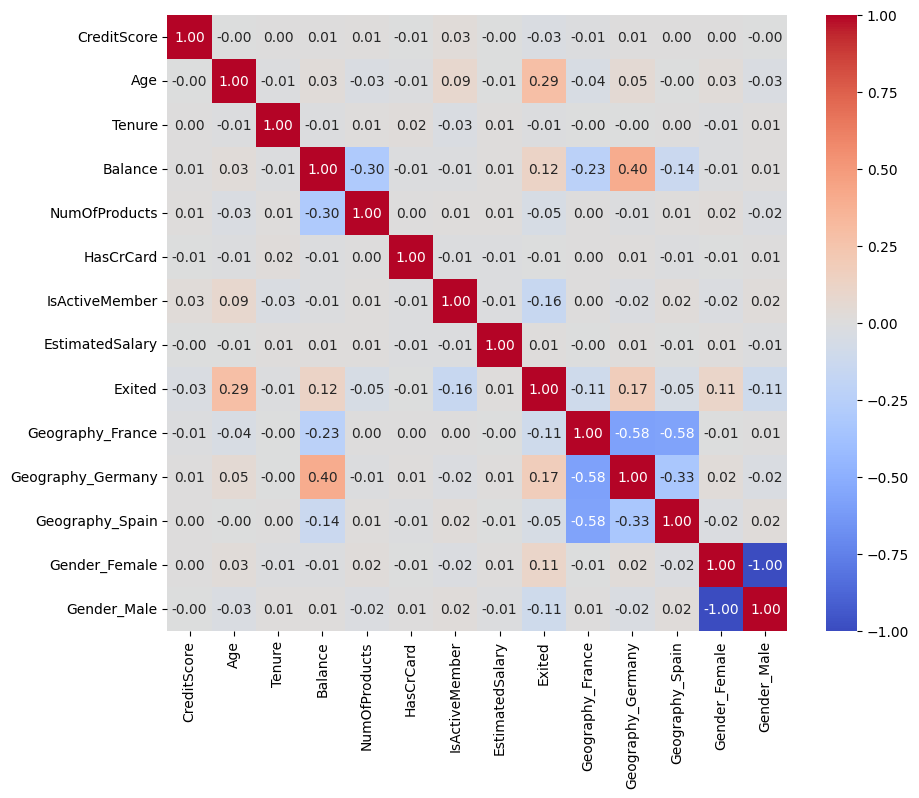

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [17]:
df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3055,812,44.0,4,115049.15,2,1.0,0.0,165038.41,0
8485,670,25.0,7,0.00,2,1.0,1.0,144723.38,0
4530,697,43.0,7,115371.94,2,1.0,0.0,64139.10,0


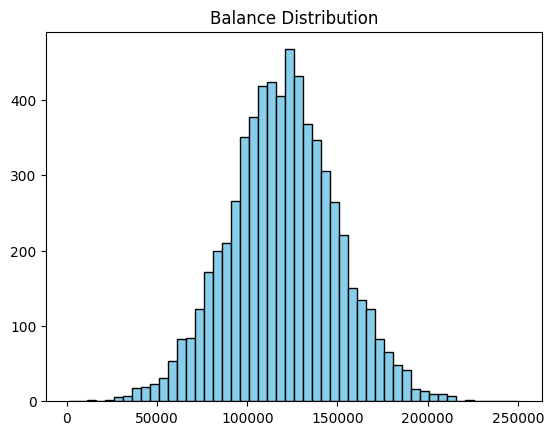

In [57]:
plt.hist(
    df['Balance'],
    bins=50,                # number of bins
    color='skyblue',        # fill color
    range = (1000, max(df['Balance'])),
    edgecolor='black',      # bar edges
    alpha=1,              # transparency
    histtype='bar',         # bar/step/stepfilled
)

plt.title('Balance Distribution')

plt.show()

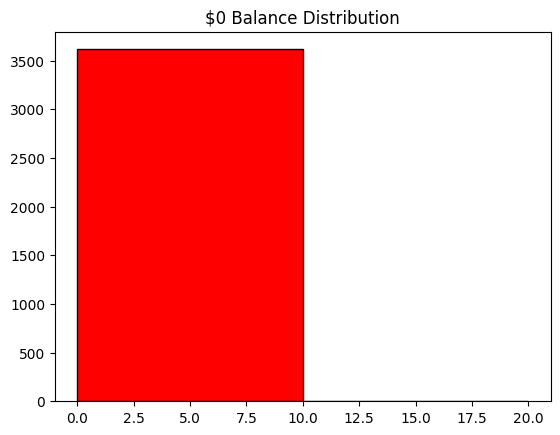

<module 'matplotlib.pyplot' from 'c:\\Users\\hp\\OneDrive\\Desktop\\DATA-SCIENCE-PROJECT\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [128]:
plt.hist(
    df['Balance'],
    bins=2,                # number of bins
    color='r',        # fill color
    range = (0, 20),
    edgecolor='black',      # bar edges
    alpha=1,              # transparency
    histtype='bar',         # bar/step/stepfilled
)

plt.title('$0 Balance Distribution')

plt.show()

plt

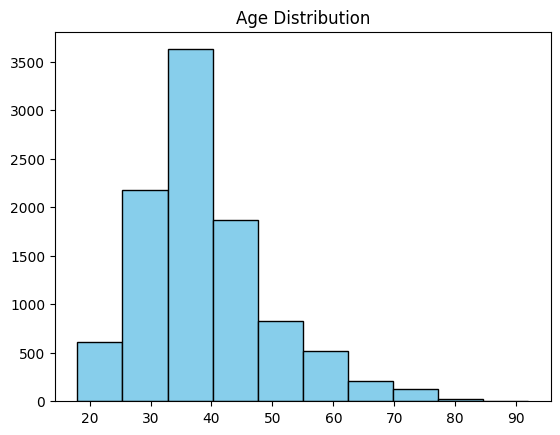

Maximum Age:  92.0
Minimum Age:  18.0


In [93]:
plt.hist(
    df['Age'],
    bins=10,                # number of bins
    color='skyblue',        # fill color
    edgecolor='black',      # bar edges
    alpha=1,              # transparency
    histtype='bar',         # bar/step/stepfilled
)

plt.title('Age Distribution')
plt.show()


print( "Maximum Age: " , max(df['Age']))
print( "Minimum Age: " , min(df['Age']))

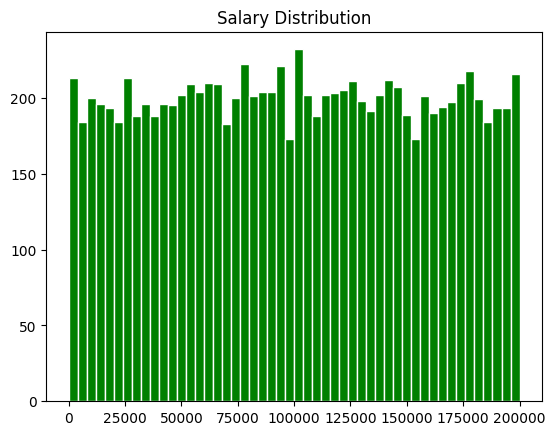

The mean Estimated Salary is: 100099.79


In [74]:
plt.hist(
    df['EstimatedSalary'],
    bins=50,                # number of bins
    color='g',        # fill color
    edgecolor='white',      # bar edges
    alpha=1,              # transparency
    histtype='bar',         # bar/step/stepfilled
)
plt.title('Salary Distribution')
plt.show()

print(f'The mean Estimated Salary is: {df['EstimatedSalary'].mean():.2f}')

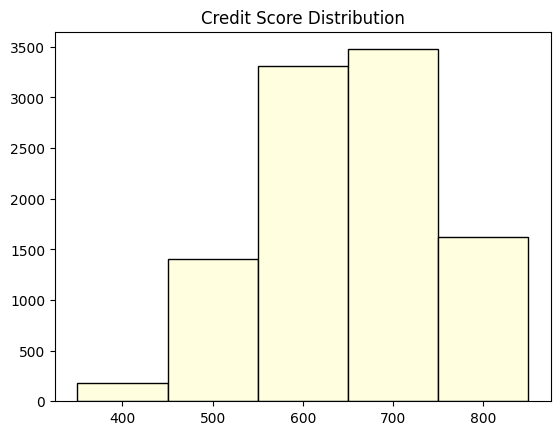

Maximum Credit Score :  850
Mean Credit Score :  650
Minimum Credit Score :  350


In [79]:
plt.hist(
    df['CreditScore'],
    bins=5,                # number of bins
    color='lightyellow',        # fill color
    edgecolor='black',      # bar edges
    alpha=1,              # transparency
    histtype='bar',         # bar/step/stepfilled
)
plt.title('Credit Score Distribution')

plt.show()


print("Maximum Credit Score : ", max(df['CreditScore']))
print("Mean Credit Score : ", int(df['CreditScore'].mean()))
print("Minimum Credit Score : ", min(df['CreditScore']))

In [83]:
cleaned_df.sample(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2857,534,51.0,3,0.00,2,0.0,1.0,20856.31,0,0.0,0.0,1.0,0.0,1.0
5330,616,29.0,9,0.00,1,1.0,1.0,166984.44,0,1.0,0.0,0.0,0.0,1.0
8170,599,61.0,1,124737.96,1,0.0,1.0,90389.61,1,0.0,1.0,0.0,0.0,1.0


In [94]:
# print(f'IS ACTIVE MEMBER: {cleaned_df['IsActiveMember'].value_counts()}')
# print(f'Geography_France: {cleaned_df['Geography_France'].value_counts()}')
# print(f'Female Gender: {cleaned_df['Gender_Female'].value_counts()}')

It shows the one with less money leaves the bank which is the universal truth cause why tf would anyone with more money leave the bank haha

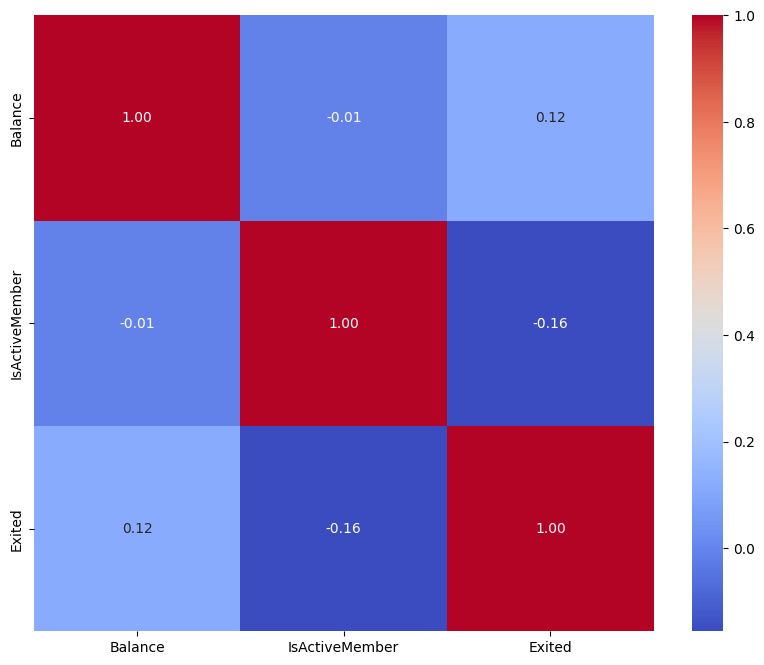

In [118]:
plt.figure(figsize=(10, 8))
sns.heatmap(cleaned_df[['Balance', 'IsActiveMember', 'Exited']].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


# **INPUT AND OUTPUT FEATURES**

In [121]:
X = cleaned_df.drop(columns = ['Exited'])
y = cleaned_df[['Exited']]

# **TRAIN-TEST-SPLIT**

In [126]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# **MODEL TRAINING**

In [131]:
import wandb

wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: C:\Users\hp\_netrc
wandb: Currently logged in as: ajheshbasnet (ajheshbasnet-kpriet) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [177]:
from sklearn.ensemble import RandomForestClassifier

rfc_params = {
    'n_estimators': 80,
    'criterion': 'gini',
    'max_depth': 11,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'min_weight_fraction_leaf': 0,
    'max_features': 'sqrt'
}

In [178]:
run = wandb.init(
    project = "DataScience",
    name = "RandomForestClassifier",
    config = rfc_params
)

In [179]:
rfc = RandomForestClassifier(**rfc_params)
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

c:\Users\hp\OneDrive\Desktop\DATA-SCIENCE-PROJECT\venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [180]:
from sklearn.metrics import accuracy_score, precision_score

accuracy_score = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)

In [181]:
wandb.log({
    'accuracy_score': accuracy_score, 
    'precision_score': precision_score
    })

run.finish()

wandb: ERROR The nbformat package was not found. It is required to save notebook history.


accuracy_score,▁
precision_score,▁
accuracy_score,0.857
precision_score,0.78641
